# 2 неделя

Статистическая проверка гипотез:
* о типе закона распределения
* об однородности двух или нескольких выборок
* о численных значениях параметров генеральной совокупности

1. Критерий отношения правдоподобия для простой гипотезы
2. Критерий отношения правдоподобия для сложной гипотезы
3. Последовательный критерий отношения правдоподобия Вальда
4. Критерии согласия Колмогорова, Колмогорова-Смирнова, хи-квадрат Пирсона (для простой и сложной гипотезы)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1407)

#### Load data

In [2]:
df = pd.read_csv('russia_COVID.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.fillna(0)

new_cases = df['new_cases'][160:].pct_change().dropna()
new_deaths = df['new_deaths'][160:].pct_change().dropna()
close_RTS = df['Close_RTS'][160:].pct_change().dropna()

#### General EDA

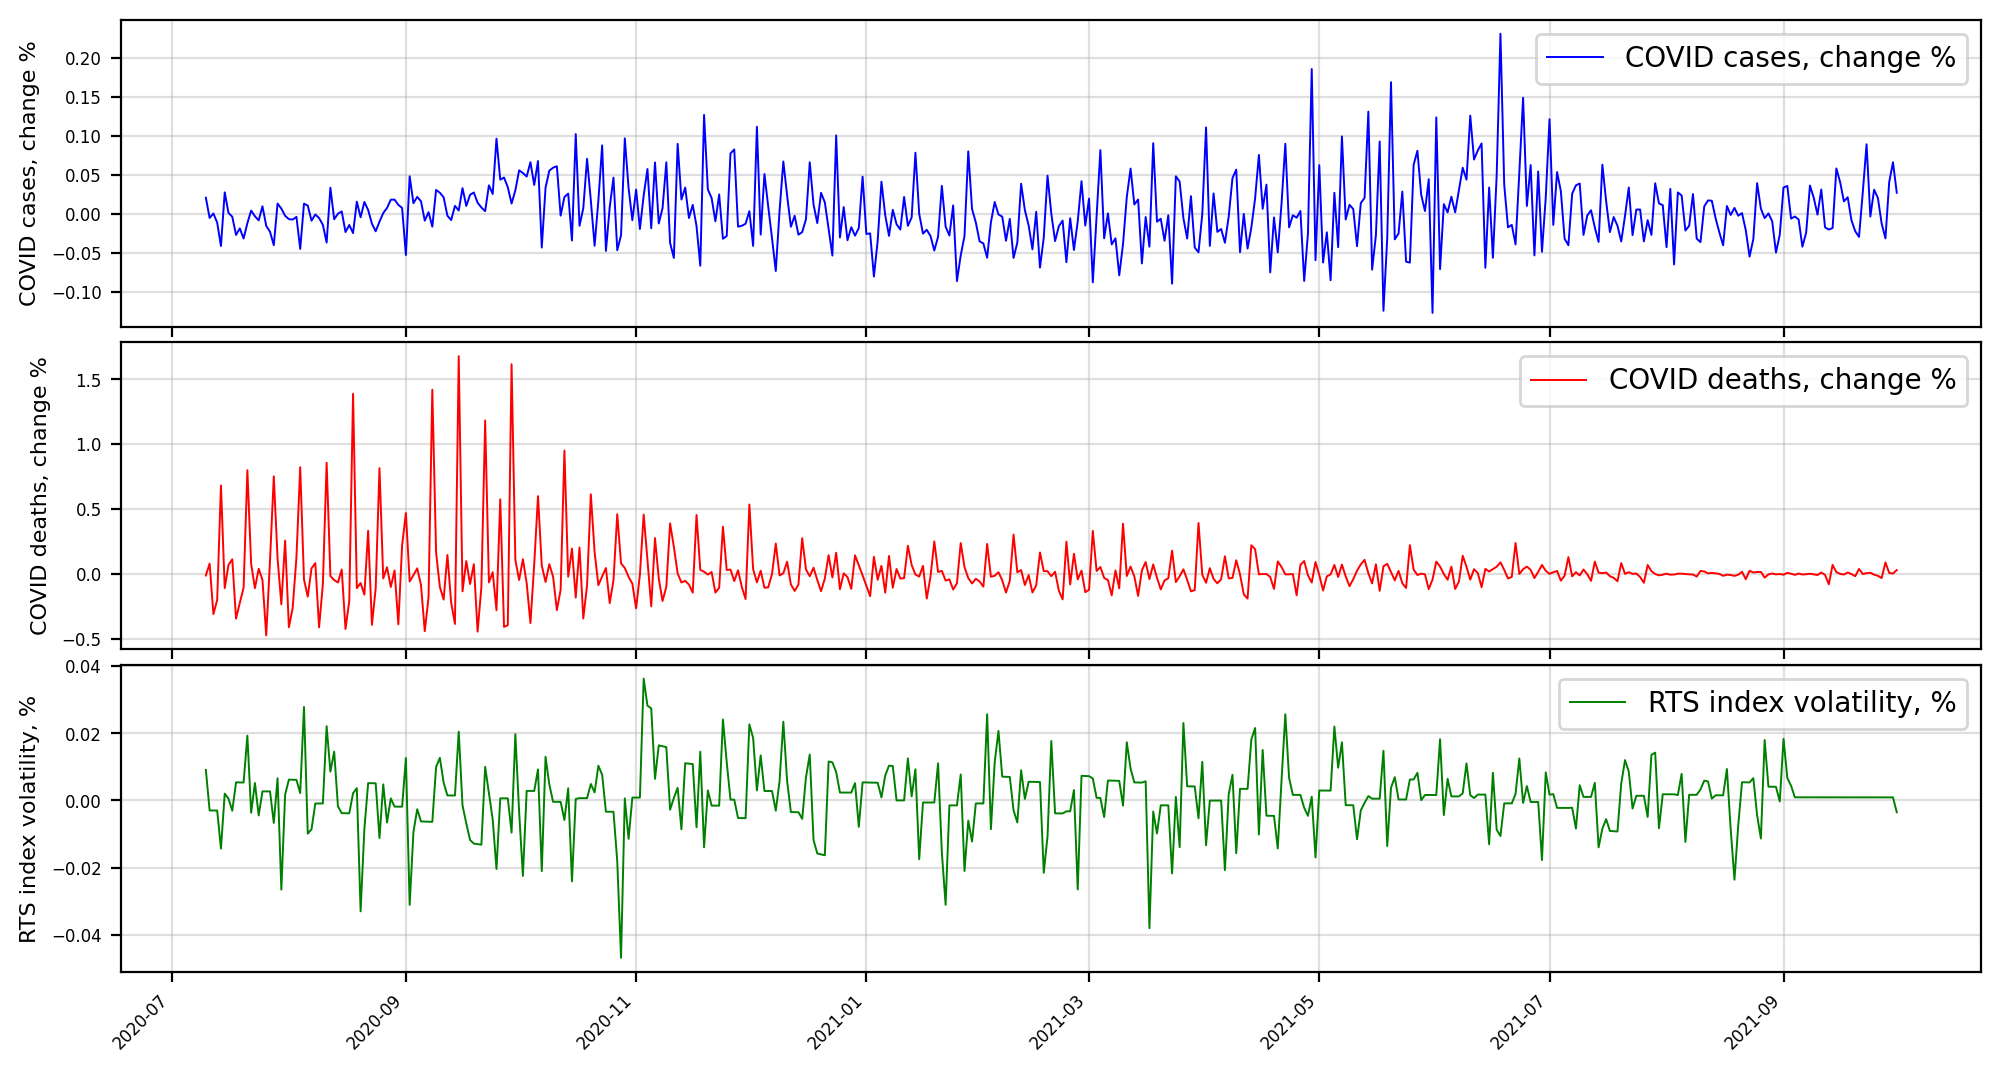

In [3]:
fig, axs = plt.subplots(nrows=3, figsize=(12, 7), dpi=200, sharex=True)
[(ax.tick_params(axis='both', labelsize=6), ax.grid(alpha=.4)) for ax in axs]
fig.subplots_adjust(hspace=.05)
fig.autofmt_xdate(rotation=45)
axs[0].plot(new_cases, color='b', linewidth=.7)
axs[0].set_ylabel('COVID cases, change %', fontsize=8)
axs[1].plot(new_deaths, color='r', linewidth=.7)
axs[1].set_ylabel('COVID deaths, change %', fontsize=8)
axs[2].plot(close_RTS, color='g', linewidth=.7)
axs[2].set_ylabel('RTS index volatility, %', fontsize=8)

axs[0].legend(['COVID cases, change %'], loc="upper right")
axs[1].legend(['COVID deaths, change %'],loc="upper right")
axs[2].legend(['RTS index volatility, %'], loc="upper right")
plt.show()

#### Выборочная функция распределения,

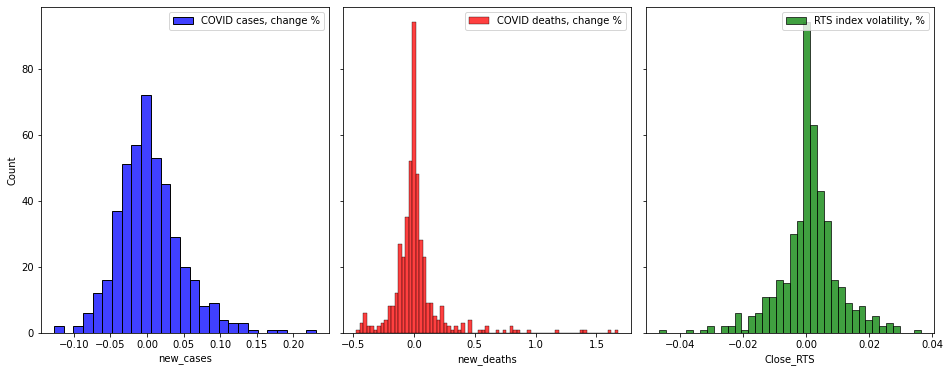

In [4]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 6), sharey=True)
fig.subplots_adjust(wspace=.05)
sns.histplot(new_cases, color='b', ax=axs[0])
sns.histplot(new_deaths, color='r', ax=axs[1])
sns.histplot(close_RTS, color='g', ax=axs[2])

axs[0].legend(['COVID cases, change %'], loc="upper right")
axs[1].legend(['COVID deaths, change %'],loc="upper right")
axs[2].legend(['RTS index volatility, %'], loc="upper right")

plt.show()

#### Функция плотности распределения вероятности

<AxesSubplot:xlabel='Close_RTS', ylabel='Density'>

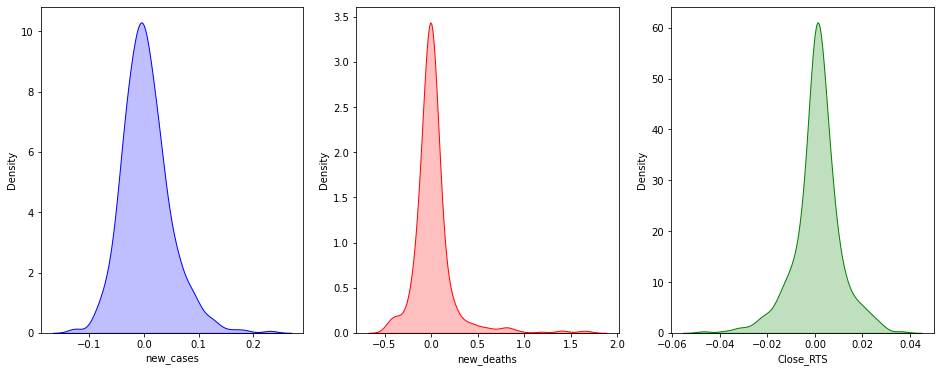

In [5]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 6))
sns.kdeplot(new_cases,  ax=axs[0], color='b', fill=True)
sns.kdeplot(new_deaths, ax=axs[1], color='r', fill=True)
sns.kdeplot(close_RTS,  ax=axs[2], color='g', fill=True)

## 1. Критерий отношения правдоподобия для простой гипотезы

Проверим, простую гипотезу о равенстве среднего каждой из выборок нулю ($\hat{X} = 0$).

Для этого проведем тесты на равенство популяционных средних для реальных данных и случайно сгенерированных нормальных распределений со средним равным нулю.:

In [6]:
new_cases_normal = np.random.standard_normal(size=new_cases.shape) * new_cases.std()
new_deaths_normal = np.random.standard_normal(size=new_deaths.shape) * new_deaths.std()
close_RTS_normal = np.random.standard_normal(size=close_RTS.shape) * close_RTS.std()

new_cases_1_0 = new_cases / new_cases.std() - new_cases.mean()
new_deaths_1_0 = new_deaths / new_deaths.std() - new_deaths.mean()
close_RTS_1_0 = close_RTS / close_RTS.std() - close_RTS.mean()

stat_1, p_1 = ss.ttest_ind(new_cases, new_cases_normal)
stat_2, p_2 = ss.ttest_ind(new_deaths, new_deaths_normal)
stat_3, p_3 = ss.ttest_ind(close_RTS, close_RTS_normal)

print(f'COVID cases:    \n statistic = {stat_1:.2f}, p-value = {p_1:.4f}\n')
print(f'COVID deaths:   \n statistic = {stat_2:.2f}, p-value = {p_2:.4f}\n')
print(f'RTS volatility: \n statistic = {stat_3:.2f}, p-value = {p_3:.4f}\n')

COVID cases:    
 statistic = 1.04, p-value = 0.2991

COVID deaths:   
 statistic = 2.25, p-value = 0.0249

RTS volatility: 
 statistic = 0.97, p-value = 0.3334



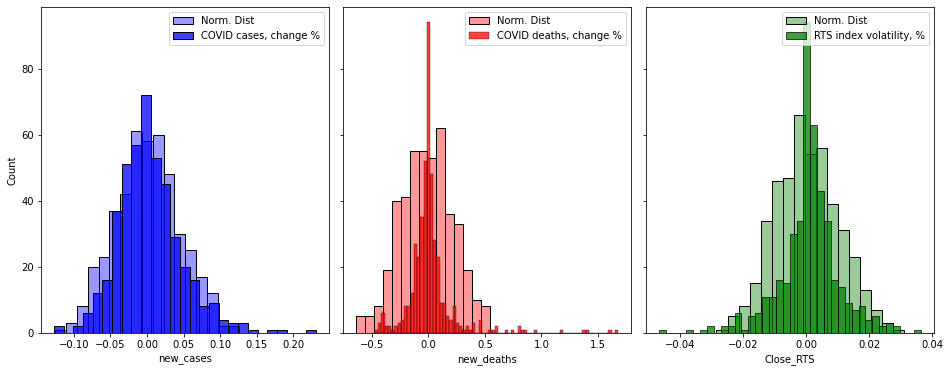

In [7]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 6), sharey=True)
fig.subplots_adjust(wspace=.05)
sns.histplot(new_cases_normal, color='b', ax=axs[0], alpha=.4)
sns.histplot(new_deaths_normal, color='r', ax=axs[1], alpha=.4)
sns.histplot(close_RTS_normal, color='g', ax=axs[2], alpha=.4)

sns.histplot(new_cases, color='b', ax=axs[0])
sns.histplot(new_deaths, color='r', ax=axs[1])
sns.histplot(close_RTS, color='g', ax=axs[2])

axs[0].legend(['Norm. Dist', 'COVID cases, change %'], loc="upper right")
axs[1].legend(['Norm. Dist', 'COVID deaths, change %'],loc="upper right")
axs[2].legend(['Norm. Dist', 'RTS index volatility, %'], loc="upper right")

plt.show()

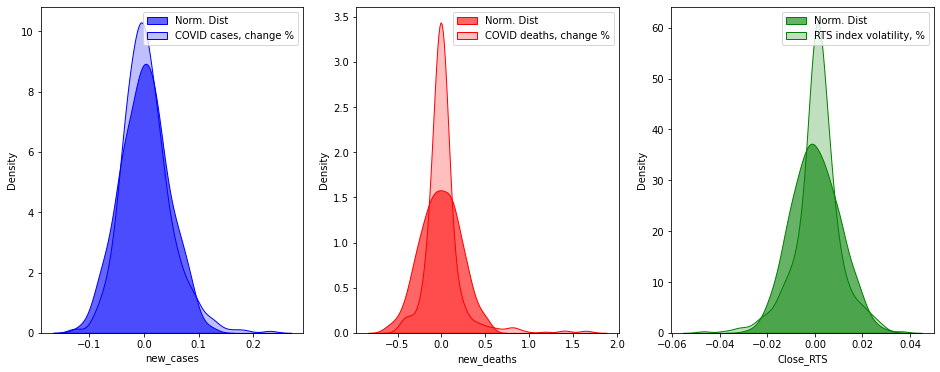

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 6))
sns.kdeplot(new_cases_normal, color='b', ax=axs[0], alpha=.6, fill=True)
sns.kdeplot(new_deaths_normal, color='r', ax=axs[1], alpha=.6, fill=True)
sns.kdeplot(close_RTS_normal, color='g', ax=axs[2], alpha=.6, fill=True)

sns.kdeplot(new_cases,  ax=axs[0], color='b', fill=True)
sns.kdeplot(new_deaths, ax=axs[1], color='r', fill=True)
sns.kdeplot(close_RTS,  ax=axs[2], color='g', fill=True)



axs[0].legend(['Norm. Dist', 'COVID cases, change %'], loc="upper right")
axs[1].legend(['Norm. Dist', 'COVID deaths, change %'],loc="upper right")
axs[2].legend(['Norm. Dist', 'RTS index volatility, %'], loc="upper right")

## 2. Критерий отношения правдоподобия для сложной гипотезы

### 2.1 О типе закона распределения

Проверим, имеет ли каждая из выборок данных нормальное распределение.

**Предположения** 

    Наблюдения в каждой выборке независимы и одинаково распределены (iid).

Для этого примем следующие нулевую `H0` и альтернативную `H1` гипотезы:

* `H0`: образец имеет гауссово распределение.
* `H1`: образец не имеет гауссовского распределения.

#### 2.1.1 Тест Шапиро-Вилка `scipy.stats.shapiro`

In [9]:
stat_1, p_1 = ss.shapiro(new_cases)
stat_2, p_2 = ss.shapiro(new_deaths)
stat_3, p_3 = ss.shapiro(close_RTS)


print(f'COVID cases:    \n statistic = {stat_1:.2f}, p-value = {p_1:.4f}\n')
print(f'COVID deaths:   \n statistic = {stat_2:.2f}, p-value = {p_2:.4f}\n')
print(f'RTS volatility: \n statistic = {stat_3:.2f}, p-value = {p_3:.4f}\n')

COVID cases:    
 statistic = 0.96, p-value = 0.0000

COVID deaths:   
 statistic = 0.68, p-value = 0.0000

RTS volatility: 
 statistic = 0.94, p-value = 0.0000



#### 2.1.2 Тест д'Агостино на $K^2$ `scipy.stats.normaltest`

In [10]:
stat_1, p_1 = ss.normaltest(new_cases_1_0)
stat_2, p_2 = ss.normaltest(new_deaths_1_0)
stat_3, p_3 = ss.normaltest(close_RTS_1_0)


print(f'COVID cases:    \n statistic = {stat_1:.2f}, p-value = {p_1:.4f}\n')
print(f'COVID deaths:   \n statistic = {stat_2:.2f}, p-value = {p_2:.4f}\n')
print(f'RTS volatility: \n statistic = {stat_3:.2f}, p-value = {p_3:.4f}\n')

COVID cases:    
 statistic = 71.72, p-value = 0.0000

COVID deaths:   
 statistic = 355.93, p-value = 0.0000

RTS volatility: 
 statistic = 52.16, p-value = 0.0000



#### 2.1.3 Тест Андерсона-Дарлинга
Тест позволяет оценить нормальность распределений при разном уровне значимости

In [11]:
result = ss.anderson(new_cases_1_0)
print(f'COVID cases:\n{result.statistic = :.2f}')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    print(f'Gaussian at the {sl}% level' if result.statistic < cv else f'not Gaussian at the {sl}% level')

COVID cases:
result.statistic = 3.66
not Gaussian at the 15.0% level
not Gaussian at the 10.0% level
not Gaussian at the 5.0% level
not Gaussian at the 2.5% level
not Gaussian at the 1.0% level


In [12]:
result = ss.anderson(new_deaths_1_0)
print(f'COVID deathes:\n{result.statistic = :.2f}')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    print(f'Gaussian at the {sl}% level' if result.statistic < cv else f'not Gaussian at the {sl}% level')

COVID deathes:
result.statistic = 38.49
not Gaussian at the 15.0% level
not Gaussian at the 10.0% level
not Gaussian at the 5.0% level
not Gaussian at the 2.5% level
not Gaussian at the 1.0% level


In [13]:
result = ss.anderson(close_RTS)
print(f'RTS volatility:\n{result.statistic = :.2f}')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    print(f'Gaussian at the {sl}% level' if result.statistic < cv else f'not Gaussian at the {sl}% level')

RTS volatility:
result.statistic = 9.11
not Gaussian at the 15.0% level
not Gaussian at the 10.0% level
not Gaussian at the 5.0% level
not Gaussian at the 2.5% level
not Gaussian at the 1.0% level


### Вывод:

Все три статистических теста позволяют отвергнуть нулевую гипотезу `Н0` о нормальности распределения для всех трех наборов данных. Причем по результатам теста Андерсона-Дарлинга вплоть до 15% уровня значимости. Следовательно, распределения всех трех наборов значительно отличаются от нормального.

---

### 2.2 Об однородности двух или нескольких выборок

#### 2.2.1 U-тест Манна-Уитни

Так как в предыдущем пункте мы выяснили что все выборки не являются номрально распределенными для проверки попарной однородности воспользуемся непараметрическим критерием Манна-Уитни



Примем следующие нулевую `H0` и альтернативную `H1` гипотезы:

* `H0`: распределения обоих образцов равны.
* `H1`: распределения обоих образцов не равны.

Приведем наши данные к виду максимально близкому к N(1, 0) и попарно проверим 3 наших распределения

In [14]:
stat_1, p_1 = ss.mannwhitneyu(new_cases_1_0, new_deaths_1_0)
stat_2, p_2 = ss.mannwhitneyu(new_cases_1_0, close_RTS_1_0)
stat_3, p_3 = ss.mannwhitneyu(new_deaths_1_0, close_RTS_1_0)

print(f'Deaths & Cases:    \n statistic = {stat_1:.2f}, p-value = {p_1:.4f}\n')
print(f'Cases & RTS Volatility:   \n statistic = {stat_2:.2f}, p-value = {p_2:.4f}\n')
print(f'Deaths & RTS Volatility: \n statistic = {stat_3:.2f}, p-value = {p_3:.4f}\n')

Deaths & Cases:    
 statistic = 102277.00, p-value = 0.7041

Cases & RTS Volatility:   
 statistic = 93783.00, p-value = 0.0710

Deaths & RTS Volatility: 
 statistic = 85131.00, p-value = 0.0001



#### 2.2.2 Тест Уилкоксона
Проверяет, равны ли распределения двух парных выборок или нет.

Примем следующие нулевую `H0` и альтернативную `H1` гипотезы:

* `H0`: распределения обоих образцов равны.
* `H1`: распределения обоих образцов не равны.

In [15]:
stat_1, p_1 = ss.wilcoxon(new_cases_1_0, new_deaths_1_0)
stat_2, p_2 = ss.wilcoxon(new_cases_1_0, close_RTS_1_0)
stat_3, p_3 = ss.wilcoxon(new_deaths_1_0, close_RTS_1_0)

print(f'Deaths & Cases:    \n statistic = {stat_1:.2f}, p-value = {p_1:.4f}\n')
print(f'Cases & RTS Volatility:   \n statistic = {stat_2:.2f}, p-value = {p_2:.4f}\n')
print(f'Deaths & RTS Volatility: \n statistic = {stat_3:.2f}, p-value = {p_3:.4f}\n')

Deaths & Cases:    
 statistic = 46248.00, p-value = 0.1211

Cases & RTS Volatility:   
 statistic = 48347.00, p-value = 0.4312

Deaths & RTS Volatility: 
 statistic = 42315.00, p-value = 0.0029



### Вывод:
Результаты 2-ух проведенных тестов на определение попарной однародности трех изучаемых выборок в двух парах из трех позволяют отвергнуть нулевую гипотезу `H0` о принадлежности выборок одному распределению. В случае с гипотезой об однородности выборок волатильности индекса RTS и процентном изменении смертей от COVID19, оба теста показали статистическую значимость позволяющую принять нулевую гипотезу об их однродности.


---

### 3. Последовательный критерий отношения правдоподобия Вальда

Используем критерий Вальда для проверки гипотез об отличии от нуля коэффициентов при построении линейной регресии для трех наших наборов данных.
В качестве зависимой переменной используем волатильность индекса RTS в качестве независимых число заболевших и смертей от COVID19.

$priceRTS =\beta_0 + \beta_1 \cdot deaths + \beta_2 \cdot cases$

In [16]:
import statsmodels.formula.api as smf

In [17]:
import numpy as np
import pandas as pd
data = pd.DataFrame([new_cases, new_deaths, close_RTS]).T

In [18]:
data.head()

,new_cases,new_deaths,Close_RTS
date,,,
2020-07-10,0.020336,-0.011364,0.009097
2020-07-11,-0.005587,0.080460,-0.002984
2020-07-12,0.000152,-0.308511,-0.002993
2020-07-13,-0.011538,-0.200000,-0.003002
2020-07-14,-0.041622,0.682692,-0.014346


In [19]:
hypothesis_0 = '(Intercept = 0, new_cases = 0)'
hypothesis_1 = '(new_cases = 0)'
hypothesis_2 = '(new_deaths = 0)'
hypothesis_3 = '(new_deaths = 0, new_cases = 0)'
results = smf.ols('Close_RTS ~ new_cases + new_deaths', data).fit()
wald_0 = results.wald_test(hypothesis_0)
wald_1 = results.wald_test(hypothesis_1)
wald_2 = results.wald_test(hypothesis_2)
wald_3 = results.wald_test(hypothesis_3)

print('H0:', hypothesis_0)
print(f'{wald_0.pvalue:.4f}')

print('H0:', hypothesis_1)
print(f'{wald_1.pvalue:.4f}')

print('H0:', hypothesis_2)
print(f'{wald_2.pvalue:.4f}')

print('H0:', hypothesis_3)
print(f'{wald_3.pvalue:.4f}')

H0: (Intercept = 0, new_cases = 0)
0.1913
H0: (new_cases = 0)
0.4919
H0: (new_deaths = 0)
0.1078
H0: (new_deaths = 0, new_cases = 0)
0.2385


In [20]:
results.cov_params().round(6)

,Intercept,new_cases,new_deaths
Intercept,0.0,-0.000000,-0.000000
new_cases,-0.0,0.000108,0.000002
new_deaths,-0.0,0.000002,0.000004


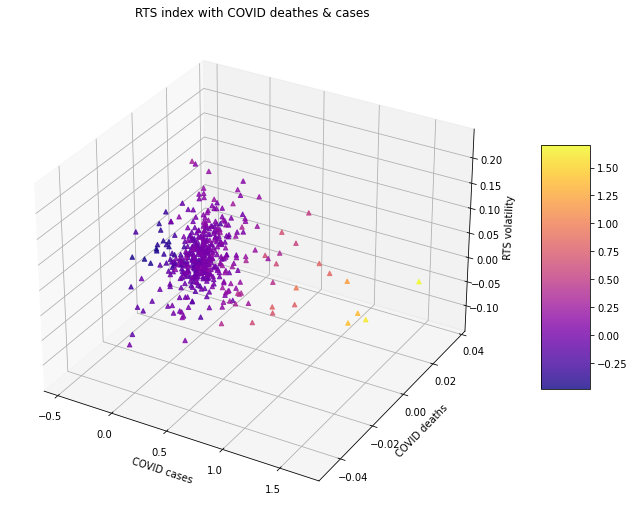

In [21]:
from mpl_toolkits import mplot3d

z, x, y = data['new_cases'], data['new_deaths'], data['Close_RTS']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
# Creating color map
my_cmap = plt.get_cmap('plasma')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('COVID cases')
ax.set_ylabel('COVID deaths')
ax.set_zlabel('RTS volatility')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.title("RTS index with COVID deathes & cases")
# show plot
plt.show()

### Вывод:
Построение модели линейной регрессии и последующая проверка статистической значимости каждого коэффициента по критерию Вальда указывает на отсутствие статистической значимости для каждого из коэффициентов, и как следствие, общую несостоятельность модели линейной регрессии.

---

### 4. Критерии согласия Колмогорова, Колмогорова-Смирнова, хи-квадрат Пирсона (для простой и сложной гипотезы)

#### 4.1 Критерий Колмагорова `scipy.stats.kstest`
Критерий согласия Колмогорова — служит для проверки гипотезы о принадлежности значений выборки к определённому теоретическому закону распределения. В данном случае проверим выборки на нормальность.

In [22]:
stat_1, p_1 = ss.kstest(new_cases_1_0, 'norm')
stat_2, p_2 = ss.kstest(new_deaths_1_0, 'norm')
stat_3, p_3 = ss.kstest(close_RTS_1_0, 'norm')

print(f'COVID cases:    \n statistic = {stat_1:.2f}, p-value = {p_1:.4f}\n')
print(f'COVID deaths:   \n statistic = {stat_2:.2f}, p-value = {p_2:.4f}\n')
print(f'RTS volatility: \n statistic = {stat_3:.2f}, p-value = {p_3:.4f}\n')

COVID cases:    
 statistic = 0.07, p-value = 0.0426

COVID deaths:   
 statistic = 0.20, p-value = 0.0000

RTS volatility: 
 statistic = 0.15, p-value = 0.0000



#### 4.2 Критерий Колмагорова-Смирнова `scipy.stats.ks_2samp`
Критерий однородности Смирнова (Колмагорова) — применяется для проверки гипотезы о принадлежности значений двух независимых выборок к одному и тому же закону распределения. Попарно рассмотрим принадлежность исследуемых данных.

In [23]:
stat_1, p_1 = ss.ks_2samp(new_cases_1_0, new_deaths_1_0)
stat_2, p_2 = ss.ks_2samp(new_cases_1_0, close_RTS_1_0)
stat_3, p_3 = ss.ks_2samp(new_deaths_1_0, close_RTS_1_0)

print(f'Deaths & Cases:    \n statistic = {stat_1:.2f}, p-value = {p_1:.4f}\n')
print(f'Cases & RTS Volatility:   \n statistic = {stat_2:.2f}, p-value = {p_2:.4f}\n')
print(f'Deaths & RTS Volatility: \n statistic = {stat_3:.2f}, p-value = {p_3:.4f}\n')

Deaths & Cases:    
 statistic = 0.17, p-value = 0.0000

Cases & RTS Volatility:   
 statistic = 0.15, p-value = 0.0001

Deaths & RTS Volatility: 
 statistic = 0.24, p-value = 0.0000



#### 4.3 Критерий согласия Пирсона (хи-квадрат) `scipy.stats.chi2_contingency`

In [24]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [df['new_cases'][160:], df['Close_RTS'][160:]]
stat, p, dof, expected = chi2_contingency(table)
print(f'{dof=}')

# interpret p-value
alpha = 0.05

print(f'{alpha=:.3f}, {p=:.4f}')

print('Dependent (reject H0)' if p >= alpha else 'Independent (fail to reject H0)')


dof=449
alpha=0.050, p=0.0000
Independent (fail to reject H0)


---